In [35]:
import pylatexenc
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

*Creating a Quantum Circuit*

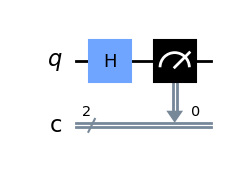

In [33]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,2)

# Apply a Hadamard gate to put the qubit in superposition
qc.h(0)

# Measure the qubit and store the result in the classical bit
qc.measure(0,0)

# Draw the circuit
qc.draw('mpl')

- The / 1 indicates how many classical bits are in the bottom rail.

- The arrow connects the qubit measurement operation to the classical register. The arrow pointing down to "`0`" means that the measurement result from the qubit (`q[0]`) will be stored in the classical bit `C[0]`.

In the statement `qc.measure(qubit_index, classical_bit_index)`, there are two arguments.

`qubit_index (0 in this case)`:
- This specifies the index of the qubit you want to measure. In your example, 0 means you are measuring the qubit at index 0 in the quantum register.

`classical_bit_index (0 in this case)`:
- This specifies the index of the classical bit where you want to store the measurement result. The result of measuring the qubit will be stored in this classical bit.

Notational remarks for `qc = QuantumCircuit(1, 2)`:
- `00`: Means `c[1] = 0` and `c[0] = 0`

- `01`: Means `c[1] = 0` and `c[0] = 1`

*i.e.* the bits are written in reverse order.

In [34]:
%matplotlib inline

# Use the Aer simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit
job = execute(qc, backend=simulator, shots=1024)

# Get the results
result = job.result()

# Get the counts (frequency of results)
counts = result.get_counts(qc)
print("Counts:", counts)

# Plot a histogram of the results
plot_histogram(counts)
plt.show()

Counts: {'00': 535, '01': 489}


*More Quantum Gates*

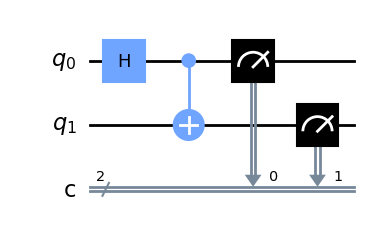

In [29]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit to create superposition
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

New `qc.measure(qubit_indices, classical_bit_indices)` notation.

In this case: `qc.measure([0, 1], [0, 1])`
- `[0, 1]` (first argument): This specifies the indices of the qubits you want to measure. Here, you're measuring qubit 0 and qubit 1.
- `[0, 1]` (second argument): This specifies the indices of the classical bits where the measurement results will be stored. Here, the measurement of qubit 0 will be stored in classical bit 0, and the measurement of qubit 1 will be stored in classical bit 1.

Or for three qubits: `qc.measure([0, 1, 2], [0, 1, 2])`. Can alternatively be written as:
- qc.measure(0, 0)
- qc.measure(1, 1)
- qc.measure(2, 2)


In [30]:
# Execute the circuit using the Aer simulator backend
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=simulator, shots=1024)
result = job.result()

# Get and display the counts
counts = result.get_counts(qc)
print("Counts:", counts)

Counts: {'00': 519, '11': 505}


11: indicates $|11\rangle$

*Another quantum circuit example*

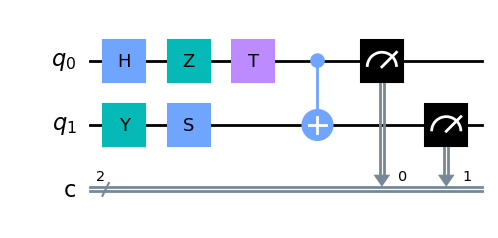

In [37]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: Apply a Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Step 2: Apply a Pauli-Y gate to qubit 1
qc.y(1)

# Step 3: Apply a Pauli-Z gate to qubit 0
qc.z(0)

# Step 4: Apply an S gate to qubit 1
qc.s(1)

# Step 5: Apply a T gate to qubit 0
qc.t(0)

# Step 6: Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Step 7: Measure both qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

In [41]:
# Execute the circuit using the Aer simulator backend
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=simulator, shots=1024)
result = job.result()

# Get and display the counts
counts = result.get_counts(qc)
print("Counts:", counts)

Counts: {'10': 524, '01': 500}


*For testing by hand*

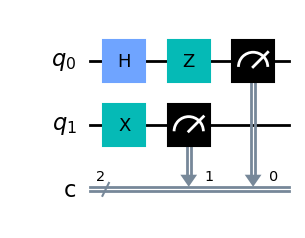

In [47]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to qubit 0
qc.h(0)

# Apply Pauli-X gate to qubit 1
qc.x(1)

# Apply Pauli-Z gate to qubit 0
qc.z(0)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

In [48]:
# Execute the circuit using the Aer simulator backend
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=simulator, shots=1024)
result = job.result()

# Get and display the counts
counts = result.get_counts(qc)
print("Counts:", counts)

Counts: {'10': 501, '11': 523}


*NOTE:* the final quantum state is: $\frac{1}{\sqrt{2}}\left(|01\rangle+|11\rangle\right)$

However, Qiskit reports outcome `10`. 

**Qiskit's Little-Endian Convention (General Case)**
1. Qubit Indexing:
- Qiskit indexes qubits from $0$ to $n-1$
- Qubit $0$ is the least significant qubit, while Qubit $n-1$ is the most significant qubit.

2. Measurement Output:
- The measurement results are represented as bit strings of length $n$.
- Qubit $0$ corresponds to the rightmost bit in the output string.
- Qubit $n-1$ corresponds to the leftmost bit in the output string.
